# MOVING AVERAGE

## Importing all the required libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from datetime import datetime
import datetime
import math
import scipy
# extract data from various Internet sources into a pandas DataFrame
import pandas_datareader as web
import matplotlib.dates as mdates
my_year_month_fmt = mdates.DateFormatter('%m/%y')

C:\Users\shwer\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 12, 31)
df_amzn = web.DataReader('AMZN', 'yahoo', start, end) 
amzn= df_amzn.copy()
amzn.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001
2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002
2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005
2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999
2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013


In [3]:
amzn.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [4]:
amzn.shape

(1510, 6)

In [5]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2014-01-02 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1510 non-null   float64
 1   Low        1510 non-null   float64
 2   Open       1510 non-null   float64
 3   Close      1510 non-null   float64
 4   Volume     1510 non-null   int64  
 5   Adj Close  1510 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 82.6 KB


In Stock trading, the **high**, **low** refers to the maximum and the minimum prices in a given time period. **Open** and **Close** are thhighLowOpenClosee prices at which a stock began and ended trading in the same period. **Volume** is the total amount of trading activity. Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

# Moving Average
<br><b>What Is Simple Moving Average (SMA)?</b></br>
<br>A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.</br>
<br>A simple moving average is a technical indicator that can aid in determining if an asset price will continue or if it will reverse a bull or bear trend</br>

# Example 
<br> Simple moving average for 5 days will be to calculate stock prices of last 5 days.</br>
<br>Say last 5 days prices were 25.4,25.9,26.5,26.3 and 27.9 then 
<br>Moving Average= Sum of all the last 5 days stock prices/5 </br>
<br>Moving Average= 26.4 </br>

# How Moving Average is useful ?
<br> Moving averages are an important analytical tool used to identify current price trends and the potential for a change in an established trend.</br> 
<br>The simplest use of an SMA in technical analysis is using it to quickly identify if a security is in an uptrend or downtrend.</br>
<br> The longer the time frame for the moving average, the smoother the simple moving average. A shorter-term moving average is more volatile, but its reading is closer to the source data.</br>

In [6]:
amzn["20d_sma"]=np.round(amzn["Close"].rolling(window=20,center=False).mean(),5)
amzn["10d_sma"]=np.round(amzn["Close"].rolling(window=10,center=False).mean(),5)
amzn["60d_sma"]=np.round(amzn["Close"].rolling(window=60,center=False).mean(),5)
amzn["30d_sma"]=np.round(amzn["Close"].rolling(window=30,center=False).mean(),5)

amzn.fillna(0,inplace=True)
amzn.tail(10)

,High,Low,Open,Close,Volume,Adj Close,20d_sma,10d_sma,60d_sma,30d_sma
Date,,,,,,,,,,
2019-12-17,1792.000000,1777.390015,1778.010010,1790.660034,3644400,1790.660034,1764.58748,1757.13497,1760.39266,1767.08965
2019-12-18,1798.199951,1782.359985,1795.020020,1784.030029,3351400,1784.030029,1766.14948,1759.46898,1761.09966,1766.50032
2019-12-19,1792.989990,1774.060059,1780.500000,1792.280029,2652800,1792.280029,1768.48698,1764.64899,1761.49883,1766.38399
2019-12-20,1802.969971,1782.449951,1799.619995,1786.500000,5150800,1786.500000,1771.07648,1768.13899,1762.27650,1766.32732
2019-12-23,1793.000000,1784.510010,1788.260010,1793.000000,2136400,1793.000000,1773.44048,1772.48799,1763.40233,1766.56466
2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961,1774.20898,1777.48799,1764.29066,1767.14999
2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020,1777.80049,1789.49299,1766.50933,1770.17566
2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049,1780.36499,1800.44000,1769.11883,1774.06532
2019-12-30,1884.000000,1840.619995,1874.000000,1846.890015,3674700,1846.890015,1782.66949,1809.03501,1771.16000,1777.14166


Text(0, 0.5, 'Price in $')

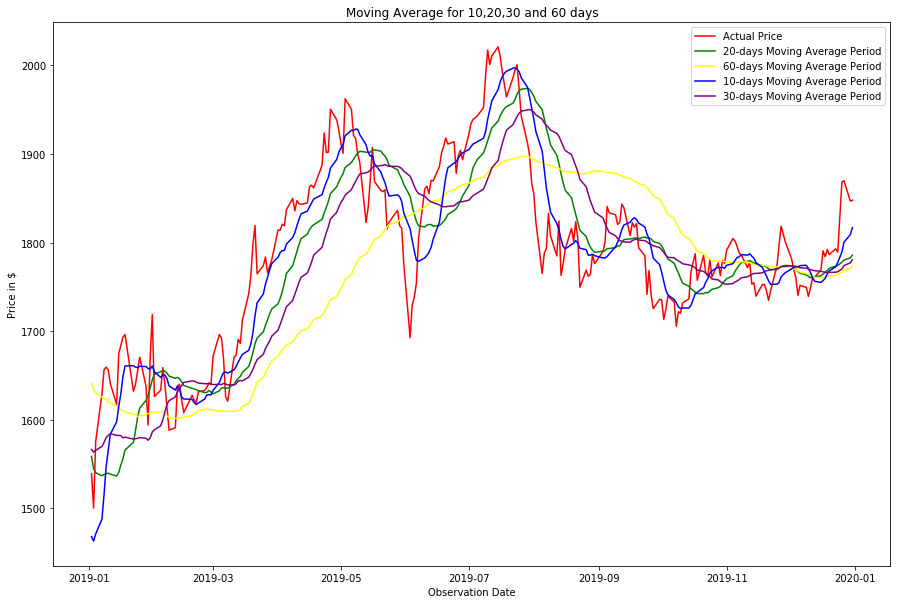

In [7]:
start_date = '2019-01-01'
end_date = '2019-12-31'

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(amzn.loc[start_date:end_date, :].index, amzn.loc[start_date:end_date, 'Close'], label='Actual Price', color = 'red')
ax.plot(amzn.loc[start_date:end_date, :].index, amzn.loc[start_date:end_date, '20d_sma'], label = '20-days Moving Average Period', color = 'green')
ax.plot(amzn.loc[start_date:end_date, :].index, amzn.loc[start_date:end_date, '60d_sma'], label = '60-days Moving Average Period', color = 'yellow')
ax.plot(amzn.loc[start_date:end_date, :].index, amzn.loc[start_date:end_date, '10d_sma'], label = '10-days Moving Average Period', color = 'blue')
ax.plot(amzn.loc[start_date:end_date, :].index, amzn.loc[start_date:end_date, '30d_sma'], label = '30-days Moving Average Period', color = 'purple')
ax.legend(loc='best')
ax.set_title('Moving Average for 10,20,30 and 60 days')
ax.set_xlabel('Observation Date')
ax.set_ylabel('Price in $')

# Observations:
<br>The 20 days may be of analytical benefit to a shorter-term trader since it follows the price more closely and therefore produces less "lag" but may be more volatile.</br>
<br> While the 60 and 120 days which is more smoother curve may be more beneficial to a longer-term trader.</br>

# Exponential Moving Average

<br><b>What Is an Exponential Moving Average (EMA)?</b></br>
<br>An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points.</br>
<br>The exponential moving average is also referred to as the exponentially weighted moving average.</br>
<br>An exponentially weighted moving average reacts more significantly to recent price changes than a simple moving average (SMA), which applies an equal weight to all observations in the period </br>


# Usage of EMA
<br>Like all moving averages, this technical indicator is used to produce buy and sell signals based on crossovers and divergences from the historical average.</br>

Text(0, 0.5, 'Price in $')

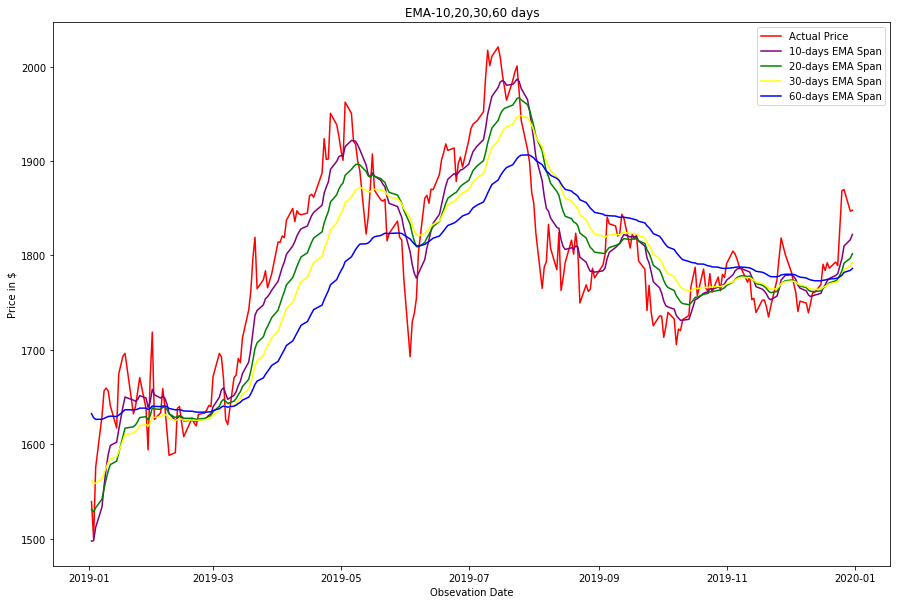

In [8]:
# ewm(exponential weighted) function in pandas which helps to find exponent
ema_10= amzn.ewm(span=10, adjust=False).mean()
ema_20= amzn.ewm(span=20, adjust=False).mean()
ema_30= amzn.ewm(span=30, adjust=False).mean()
ema_60 = amzn.ewm(span=60, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(amzn.loc[start_date:end_date, :].index, amzn.loc[start_date:end_date, 'Close'], label='Actual Price', color = 'red')
ax.plot(ema_10.loc[start_date:end_date, :].index, ema_10.loc[start_date:end_date, 'Close'], label = '10-days EMA Span', color = 'purple')
ax.plot(ema_20.loc[start_date:end_date, :].index, ema_20.loc[start_date:end_date, 'Close'], label = '20-days EMA Span', color = 'green')
ax.plot(ema_30.loc[start_date:end_date, :].index, ema_30.loc[start_date:end_date, 'Close'], label = '30-days EMA Span', color = 'yellow')
ax.plot(ema_60.loc[start_date:end_date, :].index, ema_60.loc[start_date:end_date, 'Close'], label = '60-days EMA Span', color = 'blue')

ax.legend(loc='best')
ax.set_title('EMA-10,20,30,60 days')
ax.set_xlabel('Obsevation Date')
ax.set_ylabel('Price in $')

Text(0, 0.5, 'Price in $')

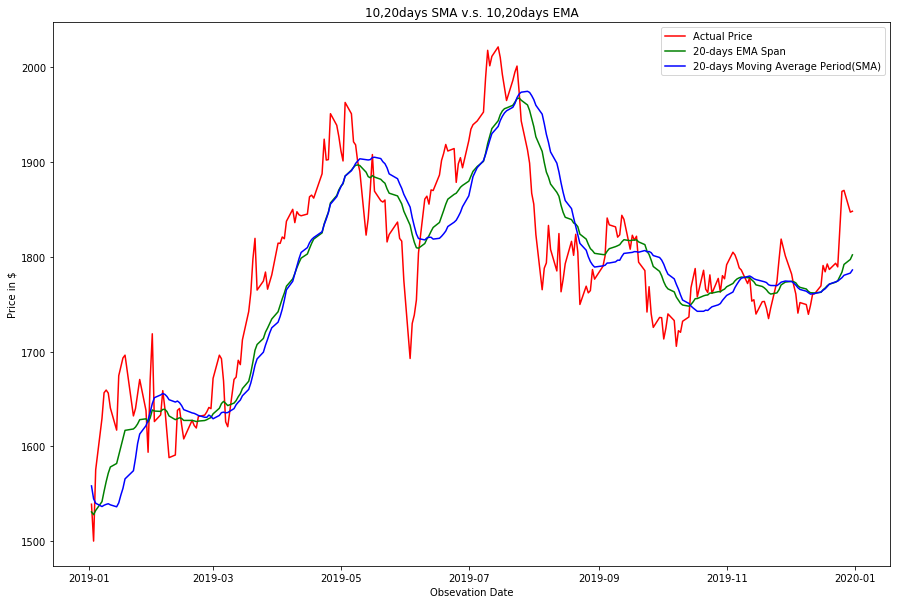

In [9]:
# Checking difference between SMA for 20 days and EMA for 20 days

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(amzn.loc[start_date:end_date, :].index, amzn.loc[start_date:end_date, 'Close'], label='Actual Price', color = 'red')
ax.plot(ema_20.loc[start_date:end_date, :].index, ema_20.loc[start_date:end_date, 'Close'], label = '20-days EMA Span', color = 'green')
#ax.plot(ema_10.loc[start_date:end_date, :].index, ema_10.loc[start_date:end_date, 'Close'], label = '10-days EMA Span', color = 'yellow')
ax.plot(amzn.loc[start_date:end_date, :].index, amzn.loc[start_date:end_date, '20d_sma'], label = '20-days Moving Average Period(SMA)', color = 'blue')
#ax.plot(amzn.loc[start_date:end_date, :].index, amzn.loc[start_date:end_date, '10d_sma'], label = '10-days Moving Average Period(SMA)', color = 'black')
ax.legend(loc='best')
ax.set_title('10,20days SMA v.s. 10,20days EMA')
ax.set_xlabel('Obsevation Date')
ax.set_ylabel('Price in $')


# Observations
<br>EMA 20 days is closer to Actual than SMA 20 days</br>

In [10]:
amzn_new=pd.DataFrame()
amzn_new['Actual Close'] = amzn['Close']
amzn_new['20days EMA Close'] = ema_20['Close']
amzn_new.tail(20)

,Actual Close,20days EMA Close
Date,,
2019-12-03,1769.959961,1773.585217
2019-12-04,1760.689941,1772.357096
2019-12-05,1740.479980,1769.321180
2019-12-06,1751.599976,1767.633446
2019-12-09,1749.510010,1765.907405
2019-12-10,1739.209961,1763.364791
2019-12-11,1748.719971,1761.970046
2019-12-12,1760.329956,1761.813847
2019-12-13,1760.939941,1761.730618


In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(amzn_new['Actual Close'], amzn_new['20days EMA Close']))
rmse

39.552403180992876

In [12]:
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

In [13]:
x=amzn_new['Actual Close'].tolist()
y=amzn_new['20days EMA Close'].tolist()
rsquared(x,y)

0.9953803393945632

<b><br>Buy if actual actual close price cross 20days EMA from below </br></b>
<b><br>Sell if actual close price cross 20 days EMA from above </br></b>

In [14]:
for index, row in amzn_new.iterrows():
    if amzn_new.loc[index,'Actual Close'] > amzn_new.loc[index,'20days EMA Close']:
        amzn_new.loc[index,'Signal'] = 1   
    elif amzn_new.loc[index,'Actual Close'] < amzn_new.loc[index,'20days EMA Close']:
        amzn_new.loc[index,'Signal'] = -1   
    else:
        amzn_new.loc[index,'Signal'] = 0


In [15]:
amzn_new.dropna(axis=0,how='any',inplace=True)
amzn_new.head()


,Actual Close,20days EMA Close,Signal
Date,,,
2014-01-02,397.970001,397.970001,0.0
2014-01-03,396.440002,397.824287,-1.0
2014-01-06,393.630005,397.424832,-1.0
2014-01-07,398.029999,397.482467,1.0
2014-01-08,401.920013,397.905090,1.0


In [16]:
amzn_new['Signal']= amzn_new['Signal'].shift(1)
amzn_new.head(20)

,Actual Close,20days EMA Close,Signal
Date,,,
2014-01-02,397.970001,397.970001,NaN
2014-01-03,396.440002,397.824287,0.0
2014-01-06,393.630005,397.424832,-1.0
2014-01-07,398.029999,397.482467,-1.0
2014-01-08,401.920013,397.905090,1.0
2014-01-09,401.010010,398.200797,1.0
2014-01-10,397.660004,398.149293,1.0
2014-01-13,390.980011,397.466504,-1.0
2014-01-14,397.540009,397.473504,-1.0


In [17]:
amzn_new['Signal'].value_counts()

 1.0    990
-1.0    518
 0.0      1
Name: Signal, dtype: int64

In [18]:
amzn_new['Actual Close'].mean()

984.4585500552954

In [19]:
initial_amt = 100000
total_shares = 30
print('Account balance ',initial_amt)
print('Initial number of shares owned ',total_shares)
avg_price = 984.46
initial_val = 39533 #initial amount+total_shares*ini_price

for index, row in amzn_new.iterrows():
    if amzn_new.loc[index,'Signal'] == 1:
        if (initial_amt - amzn_new.loc[index,'Actual Close'])> 0 :
            initial_amt -= amzn_new.loc[index,'Actual Close']
            avg_price = ((avg_price*total_shares)+amzn_new.loc[index,'Actual Close'])/(total_shares+1)
            total_shares = total_shares + 1;
            amzn_new.loc[index,'Action'] = "Buy"
        else:
            amzn_new.loc[index,'Action'] = "Buy Alert"         
    elif amzn_new.loc[index,'Signal'] == -1:
        if total_shares - 1 > 0 :
            amzn_new.loc[index,'Action'] = "Sell"
            avg_price = ((avg_price*total_shares)-amzn_new.loc[index,'Actual Close'])/(total_shares-1)
            initial_amt += amzn_new.loc[index,'Actual Close'];
            total_shares = total_shares - 1;
        else:
            amzn_new.loc[index,'Action'] = "Sell Alert"
    else:
        amzn_new.loc[index,'Action'] = "Hold"

print('----------------Signals Given During Day To Day Trade------------------------')


print(amzn_new.tail(20))

print('----------------Results-------------------------')
print('Balance left in Account',initial_amt)
print('Total Number of shares ',total_shares)



Account balance  100000
Initial number of shares owned  30
----------------Signals Given During Day To Day Trade------------------------
            Actual Close  20days EMA Close  Signal Action
Date                                                     
2019-12-03   1769.959961       1773.585217     1.0    Buy
2019-12-04   1760.689941       1772.357096    -1.0   Sell
2019-12-05   1740.479980       1769.321180    -1.0   Sell
2019-12-06   1751.599976       1767.633446    -1.0   Sell
2019-12-09   1749.510010       1765.907405    -1.0   Sell
2019-12-10   1739.209961       1763.364791    -1.0   Sell
2019-12-11   1748.719971       1761.970046    -1.0   Sell
2019-12-12   1760.329956       1761.813847    -1.0   Sell
2019-12-13   1760.939941       1761.730618    -1.0   Sell
2019-12-16   1769.209961       1762.442936    -1.0   Sell
2019-12-17   1790.660034       1765.130279     1.0    Buy
2019-12-18   1784.030029       1766.930255     1.0    Buy
2019-12-19   1792.280029       1769.344519     1.0 

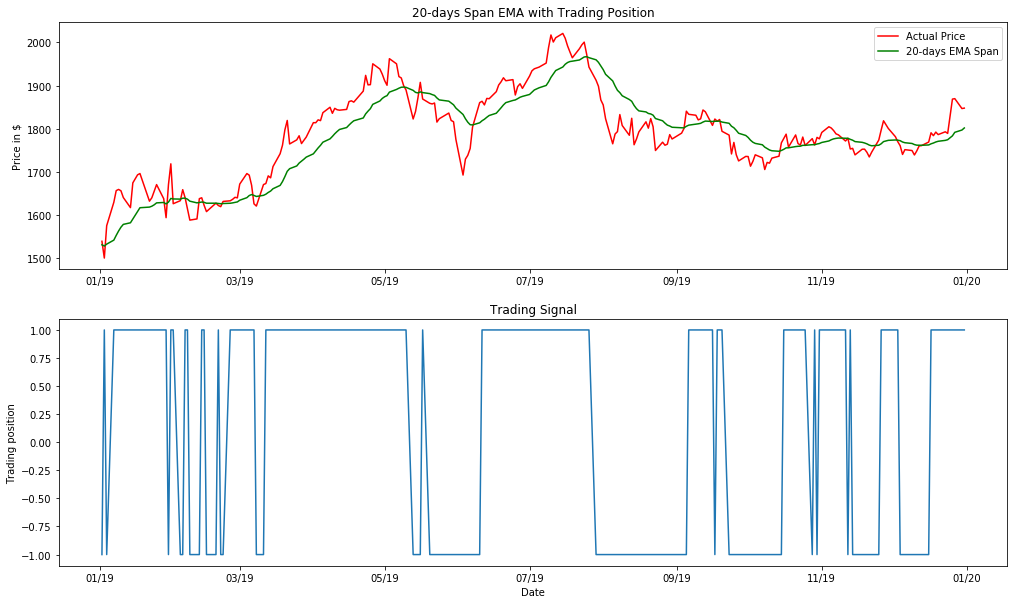

In [20]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(17,10))

ax1.plot(amzn_new.loc[start_date:end_date, :].index, amzn_new.loc[start_date:end_date, 'Actual Close'], label='Actual Price', color = 'red')
ax1.plot(amzn_new.loc[start_date:end_date, :].index, amzn_new.loc[start_date:end_date, '20days EMA Close'], label = '20-days EMA Span', color = 'green')

ax1.set_title('20-days Span EMA with Trading Position')
ax1.set_ylabel('Price in $')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(amzn_new.loc[start_date:end_date, :].index, amzn_new.loc[start_date:end_date, 'Signal'], 
        label='Trading position')
ax2.set_title('Trading Signal')
ax2.set_xlabel('Date')
ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

In [21]:
# Conclusions
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Metric", "Scores"]

x.add_row(["RMSE", 39])
x.add_row(["RSquared", 0.995])

print(x)

+----------+--------+
|  Metric  | Scores |
+----------+--------+
|   RMSE   |   39   |
| RSquared | 0.995  |
+----------+--------+


# Citation

1. https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
2. https://www.investopedia.com/terms/s/sma.asp
3. https://www.investopedia.com/terms/e/ema.asp